In [1]:
#Preamble
import tensorflow as tf
#enable Eager execution
tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt
import TaylorFlow0PN_190710 as tlf

In [2]:
def cmplxInnerProd(temp,data,psd,df):
    "computes complex inner product in the fourier domain IP = 4 deltaf sum((a * conguagte(b))/Weights)"
    
    temp_psd = tf.divide(temp,tf.sqrt(psd))
    data_psd = tf.divide(data,tf.sqrt(psd))
    
    return tf.multiply((4*df),tf.reduce_sum(tf.multiply(temp_psd,data_psd)))

def InnerProd(temp,data,psd,df):
    "computes inner product in the fourier domain IP = 4 deltaf RE sum((a * conguagte(b))/Weights)"
    
    return tf.real(cmplxInnerProd(temp,data,psd,df))

def sigsq(temp, psd, df):
    "computes sig^2 = (a|a), which can then be used to normalise function "
    temp_psd = tf.divide(temp,psd)
    
    return tf.real(tf.multiply(4*df,tf.reduce_sum(tf.multiply(temp_psd,temp_psd))))

def sig(temp, psd, df):
    "returns the sigma value of the signal"
    
    return tf.sqrt(sigsq(temp, psd, df))

def TensorNorm(a):
    "divides by max value of tensor to normalise between 0 and 1"
    TensorMax = tf.reduce_max(tf.abs(a))
    
    return tf.divide(tf.abs(a),TensorMax),TensorMax

def overlap(temp,data,psd,df):
    "Overlap equation"
    
    #norm= tf.reciprocal(tf.multiply(sig(a,psd,df),sig(b,psd,df)))
    norm = tf.divide(1,tf.multiply(sig(temp,psd,df),sig(data,psd,df)))
    print(norm)
    print()
    inner = InnerProd(temp,data,psd,df)
    print(inner)
    overlap = tf.multiply(norm,inner)
    print(overlap)
        
    return overlap

def SNR(temp,data,psd,df):
    "Returns the SNR along with the normalization"
    norm = tf.reciprocal(sig(temp,psd,df))
    inner = InnerProd(temp,data,psd,df)
    
    return tf.multiply(norm,inner)

In [3]:
s1_m1 = 10
s1_m2 = 10
s2_m1 = 20
s2_m2 = 15
df = 0.1
f_low = 5.
f_high = 1000.

freq1,wvf1 = tlf.TaylorFlow(s1_m1, s1_m2, f_low=f_low, f_high=f_high, df = df, t_c=0, phi_c = 0)
freq2,wvf2 = tlf.TaylorFlow(s2_m1, s2_m2, f_low=f_low, f_high=f_high, df = df, t_c=0, phi_c = 0)
wvfn1,max1 = TensorNorm(wvf1)
wvfn2,max2 = TensorNorm(wvf2)

wvf1t = np.fft.ifft(wvf1)
wvf2t = np.fft.ifft(wvf2)

Instructions for updating:
Colocations handled automatically by placer.


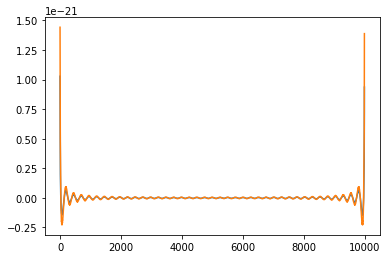

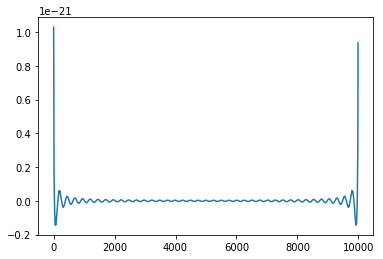

In [4]:
plt.figure()
plt.plot((np.real(wvf1t)))
plt.plot((np.real(wvf2t)))

plt.figure()
plt.plot((np.real(wvf1t)))

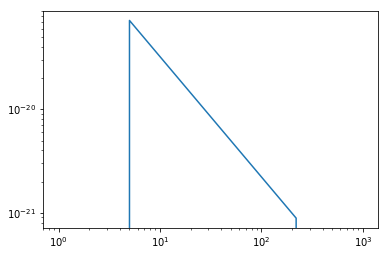

In [5]:
plt.figure()
plt.loglog(freq1.numpy(),np.real(wvf1))

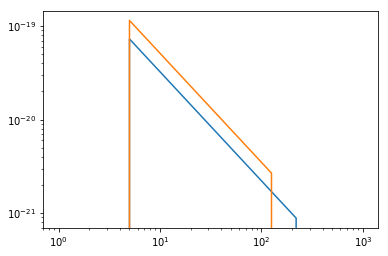

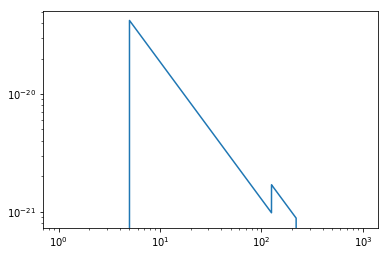

In [6]:
plt.figure()
plt.loglog(freq1.numpy(),abs(wvf1))
plt.loglog(freq2.numpy(),abs(wvf2))
#plt.axis([1,f_high+1,1e-3,1.1])

plt.figure()
plt.loglog(freq1.numpy(),abs((abs(wvf1)-abs(wvf2))))
psd = np.ones(len(wvf1),dtype=np.float32)

In [7]:
print(wvf1)
print(wvf2)

tf.Tensor([0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j], shape=(9990,), dtype=complex64)
tf.Tensor([0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j], shape=(9990,), dtype=complex64)


In [8]:
overlap = overlap(wvfn1,wvfn2,psd,df)
SNR = SNR(wvfn1,wvfn2,psd,df)

tf.Tensor(0.066440426, shape=(), dtype=float32)

tf.Tensor(14.997558, shape=(), dtype=float32)
tf.Tensor(0.9964441, shape=(), dtype=float32)


In [9]:
print(overlap)
print(SNR)

tf.Tensor(0.9964441, shape=(), dtype=float32)
tf.Tensor(3.8588974, shape=(), dtype=float32)


In [10]:
cmplxIP = cmplxInnerProd(wvf1,wvf2,psd,df)
print(cmplxIP)
IP = InnerProd(wvf1,wvf2,psd,df)
print(IP)
sig1 = sig(wvf1,psd,df)
print(sig1)
sig2 = sig(wvf2,psd,df)
print(sig2)
sigsq1= sigsq(wvf1, psd, df)
print(sigsq1)
sigsq2= sigsq(wvf2, psd, df)
print(sigsq2)

TypeError: x and y must have the same dtype, got tf.complex64 != tf.float32